In [3]:
#Automating Pulling(by fuction loops)data using API keys, storing in csv, loading into dataframes then cleaning followed by EDA
def api_runner():
    #This example uses Python 2.7 and the python-request library.
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '571776fb-8892-42d1-890f-d63e3fe93b16',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    import pandas as pd
    pd.set_option('display.max_columns', None)
    df= pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)(older version)
    #df = pd.concat([df, df2], ignore_index=True)  # `ignore_index=True` resets the index (newVersion)
    if not os.path.isfile(r"C:\Users\vasub\Desktop\UB Learn\PYTHON_projects\API_automation\API.csv"):
        df.to_csv(r"C:\Users\vasub\Desktop\UB Learn\PYTHON_projects\API_automation\API.csv", header = 'column_names')
    else:
        df.to_csv(r"C:\Users\vasub\Desktop\UB Learn\PYTHON_projects\API_automation\API.csv",mode= 'a', header = False)

        
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print(f"{i}th iteration of API extraction is completed")
    sleep(60)
exit()


0th iteration of API extraction is completed
1th iteration of API extraction is completed
2th iteration of API extraction is completed
3th iteration of API extraction is completed
4th iteration of API extraction is completed
5th iteration of API extraction is completed


KeyboardInterrupt: 

In [5]:
import pandas as pd
df_final= pd.read_csv(r"C:\Users\vasub\Desktop\UB Learn\PYTHON_projects\API_automation\API.csv")
df_final

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981593e+07,1.981593e+07,False,NaN,1,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,101552.078894,9.145268e+10,389.5628,0.198441,-2.898300,-1.596843,6.819582,6.359299,39.934712,2.012349e+12,57.9989,2.132594e+12,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
1,1,1027,Ethereum,ETH,ethereum,9899,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205105e+08,1.205105e+08,True,NaN,2,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3166.001776,4.083130e+10,218.7633,0.187741,-4.130089,-4.304568,-6.866504,-11.865842,20.099815,3.815365e+11,10.9964,3.815365e+11,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
2,2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.764121e+10,9.998659e+10,False,NaN,3,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3.019578,1.626751e+10,454.5736,-0.488954,-2.307229,-4.064071,37.730294,101.821516,471.908882,1.740522e+11,5.0139,3.019578e+11,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
3,3,825,Tether USDt,USDT,tether,114906,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.393351e+11,1.415730e+11,True,NaN,4,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,0.999819,1.676720e+11,191.8914,0.009836,-0.010896,0.080815,0.167973,-0.042693,0.024830,1.393098e+11,4.0131,1.415473e+11,NaN,2025-01-27T22:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-27 17:39:28.598740
4,4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.866950e+08,5.928925e+08,True,NaN,5,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,235.138593,1.125655e+10,209.1043,0.269133,-5.672352,-4.314311,21.104052,-0.772675,31.019389,1.144408e+11,3.2984,1.394119e+11,NaN,2025-01-27T22:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,1975,Chainlink,LINK,chainlink,1922,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.381000e+08,1.000000e+09,False,NaN,11,NaN,NaN,NaN,2025-01-28T00:03:00.000Z,24.221527,1.158417e+09,106.4560,0.441739,-2.395364,-3.006073,10.456474,34.812514,105.338317,1.545576e+10,0.4430,2.422153e+10,NaN,2025-01-28T00:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-01-27 19:04:12.662276
161,11,5805,Avalanche,AVAX,avalanche,854,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.115987e+08,4.499350e+08,False,NaN,12,NaN,NaN,NaN,2025-01-28T00:02:00.000Z,34.198324,6.794815e+08,91.9251,0.204624,-4.220005,-4.877490,-9.226237,-20.136264,27.338063,1.407599e+10,0.4039,2.447741e+10,NaN,2025-01-28T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 19:04:12.662276
162,12,11419,Toncoin,TON,toncoin,669,2021-08-26T13:40:22.000Z,"['pos', 'ethereum-ecosystem', 'layer-1', 'ftx-...",NaN,2.489370e+09,5.120884e+09,True,NaN,13,NaN,NaN,NaN,2025-01-28T00:02:00.000Z,5.012375,2.484097e+08,133.7304,0.214489,1.635385,-0.298868,-13.649810,-22.172877,-0.080664,1.247765e+10,

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f'% x)
df_final


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19815934.00000,19815934.00000,False,NaN,1,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,101552.07889,91452676899.67812,389.56280,0.19844,-2.89830,-1.59684,6.81958,6.35930,39.93471,2012349292930.94482,57.99890,2132593656778.92993,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
1,1,1027,Ethereum,ETH,ethereum,9899,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120510510.90227,120510510.90227,True,NaN,2,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3166.00178,40831296522.28446,218.76330,0.18774,-4.13009,-4.30457,-6.86650,-11.86584,20.09982,381536491498.54974,10.99640,381536491498.54999,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
2,2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3.01958,16267513085.72454,454.57360,-0.48895,-2.30723,-4.06407,37.73029,101.82152,471.90888,174052159963.86276,5.01390,301957846196.67999,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
3,3,825,Tether USDt,USDT,tether,114906,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,139335051398.71902,141572991334.18033,True,NaN,4,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,0.99982,167672001202.55582,191.89140,0.00984,-0.01090,0.08081,0.16797,-0.04269,0.02483,139309777645.61060,4.01310,141547311644.87000,NaN,2025-01-27T22:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-27 17:39:28.598740
4,4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486695020.02872,592892487.44624,True,NaN,5,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,235.13859,11256545891.59366,209.10430,0.26913,-5.67235,-4.31431,21.10405,-0.77268,31.01939,114440782237.10948,3.29840,139411905307.45001,NaN,2025-01-27T22:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,1975,Chainlink,LINK,chainlink,1922,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,638099970.45279,1000000000.00000,False,NaN,11,NaN,NaN,NaN,2025-01-28T00:03:00.000Z,24.22153,1158417197.43958,106.45600,0.44174,-2.39536,-3.00607,10.45647,34.81251,105.33832,15455755626.69783,0.44300,24221526943.08000,NaN,2025-01-28T00:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-01-27 19:04:12.662276
161,11,5805,Avalanche,AVAX,avalanche,854,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,411598728.16452,449935028.16452,False,NaN,12,NaN,NaN,NaN,2025-01-28T00:02:00.000Z,34.19832,679481462.47365,91.92510,0.20462,-4.22000,-4.87749,-9.22624,-20.13626,27.33806,14075986866.95581,0.40390,24477406948.30000,NaN,2025-01-28T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 19:04:12.662276
162,12,11419,Toncoin,TON,toncoin,669,2021-08-26T13:40:22.000Z,"['pos', 'ethereum-ecosystem', 'layer-1', 'ftx-...",NaN,2489369952.63160,5120883975.3

In [11]:
df_copy = df_final.copy()
df_copy

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19815934.00000,19815934.00000,False,NaN,1,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,101552.07889,91452676899.67812,389.56280,0.19844,-2.89830,-1.59684,6.81958,6.35930,39.93471,2012349292930.94482,57.99890,2132593656778.92993,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
1,1,1027,Ethereum,ETH,ethereum,9899,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120510510.90227,120510510.90227,True,NaN,2,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3166.00178,40831296522.28446,218.76330,0.18774,-4.13009,-4.30457,-6.86650,-11.86584,20.09982,381536491498.54974,10.99640,381536491498.54999,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
2,2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,NaN,NaN,NaN,2025-01-27T22:39:00.000Z,3.01958,16267513085.72454,454.57360,-0.48895,-2.30723,-4.06407,37.73029,101.82152,471.90888,174052159963.86276,5.01390,301957846196.67999,NaN,2025-01-27T22:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
3,3,825,Tether USDt,USDT,tether,114906,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,139335051398.71902,141572991334.18033,True,NaN,4,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,0.99982,167672001202.55582,191.89140,0.00984,-0.01090,0.08081,0.16797,-0.04269,0.02483,139309777645.61060,4.01310,141547311644.87000,NaN,2025-01-27T22:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-27 17:39:28.598740
4,4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486695020.02872,592892487.44624,True,NaN,5,NaN,NaN,NaN,2025-01-27T22:37:00.000Z,235.13859,11256545891.59366,209.10430,0.26913,-5.67235,-4.31431,21.10405,-0.77268,31.01939,114440782237.10948,3.29840,139411905307.45001,NaN,2025-01-27T22:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 17:39:28.598740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,10,1975,Chainlink,LINK,chainlink,1922,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,638099970.45279,1000000000.00000,False,NaN,11,NaN,NaN,NaN,2025-01-28T00:03:00.000Z,24.22153,1158417197.43958,106.45600,0.44174,-2.39536,-3.00607,10.45647,34.81251,105.33832,15455755626.69783,0.44300,24221526943.08000,NaN,2025-01-28T00:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-01-27 19:04:12.662276
161,11,5805,Avalanche,AVAX,avalanche,854,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,411598728.16452,449935028.16452,False,NaN,12,NaN,NaN,NaN,2025-01-28T00:02:00.000Z,34.19832,679481462.47365,91.92510,0.20462,-4.22000,-4.87749,-9.22624,-20.13626,27.33806,14075986866.95581,0.40390,24477406948.30000,NaN,2025-01-28T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-27 19:04:12.662276
162,12,11419,Toncoin,TON,toncoin,669,2021-08-26T13:40:22.000Z,"['pos', 'ethereum-ecosystem', 'layer-1', 'ftx-...",NaN,2489369952.63160,5120883975.3

In [13]:
df_grouped = df_final.groupby('name', sort= False) [['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.25321,-1.40614,-0.63926,7.11593,6.57676,40.23413
Ethereum,0.20122,-2.54695,-3.48799,-6.59089,-11.43760,20.37829
XRP,0.19718,-0.25763,-2.50894,39.14008,99.54078,475.83174
Tether USDt,0.00334,0.00327,0.09300,0.17051,-0.02305,0.03118
Solana,0.00634,-3.63394,-3.69486,20.61723,-1.08463,30.95840
BNB,0.20917,1.25874,-0.41199,-5.96330,3.54355,12.08943
USDC,-0.00627,-0.00452,-0.00247,0.00352,0.00613,0.02806
Dogecoin,0.34993,-2.04377,-6.45353,2.81119,-17.29744,89.31045
Cardano,-0.15036,-3.25523,-8.03483,4.72574,-9.60415,162.12591


In [14]:
df_stacked = df_grouped.stack()
df_stacked

name                                 
Bitcoin  quote.USD.percent_change_1h      0.25321
         quote.USD.percent_change_24h    -1.40614
         quote.USD.percent_change_7d     -0.63926
         quote.USD.percent_change_30d     7.11593
         quote.USD.percent_change_60d     6.57676
                                           ...   
Hedera   quote.USD.percent_change_24h    -3.91610
         quote.USD.percent_change_7d     -8.25882
         quote.USD.percent_change_30d     6.21878
         quote.USD.percent_change_60d   116.23901
         quote.USD.percent_change_90d   532.08740
Length: 90, dtype: float64

In [15]:
type(df_stacked)

pandas.core.series.Series

In [16]:
df_stacked_final = df_stacked.to_frame(name= "values")
type(df_stacked_final )

pandas.core.frame.DataFrame

In [17]:
# Get the count of non-NaN values in each column of the DataFrame
max_df = df_stacked_final.count()

# Reset the index of the DataFrame
df_final = df_stacked_final.reset_index()

# Create a new index for the DataFrame if needed
df_final.index = range(len(df_final))

df_final


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.25321
1,Bitcoin,quote.USD.percent_change_24h,-1.40614
2,Bitcoin,quote.USD.percent_change_7d,-0.63926
3,Bitcoin,quote.USD.percent_change_30d,7.11593
4,Bitcoin,quote.USD.percent_change_60d,6.57676
...,...,...,...
85,Hedera,quote.USD.percent_change_24h,-3.91610
86,Hedera,quote.USD.percent_change_7d,-8.25882
87,Hedera,quote.USD.percent_change_30d,6.21878
88,Hedera,quote.USD.percent_change_60d,116.23901


In [18]:
df_final_renamed = df_final.rename(columns = {'level_1':'percent_change'})
df_final_renamed

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.25321
1,Bitcoin,quote.USD.percent_change_24h,-1.40614
2,Bitcoin,quote.USD.percent_change_7d,-0.63926
3,Bitcoin,quote.USD.percent_change_30d,7.11593
4,Bitcoin,quote.USD.percent_change_60d,6.57676
...,...,...,...
85,Hedera,quote.USD.percent_change_24h,-3.91610
86,Hedera,quote.USD.percent_change_7d,-8.25882
87,Hedera,quote.USD.percent_change_30d,6.21878
88,Hedera,quote.USD.percent_change_60d,116.23901


In [19]:
df_final_renamed['percent_change'] = df_final_renamed['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_final_renamed

,name,percent_change,values
0,Bitcoin,1h,0.25321
1,Bitcoin,24h,-1.40614
2,Bitcoin,7d,-0.63926
3,Bitcoin,30d,7.11593
4,Bitcoin,60d,6.57676
...,...,...,...
85,Hedera,24h,-3.91610
86,Hedera,7d,-8.25882
87,Hedera,30d,6.21878
88,Hedera,60d,116.23901


C:\Users\vasub\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


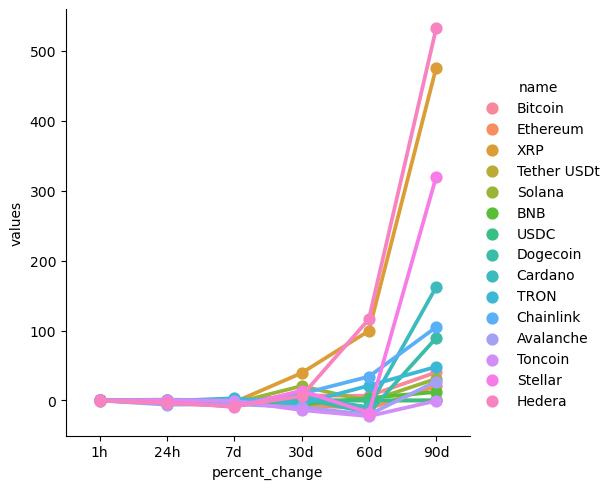

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x= 'percent_change', y = "values", hue= 'name', data = df_final_renamed,kind = 'point')

In [22]:
df_bitcoins = df_copy[['name','quote.USD.price', 'timestamp']]
df_bitcoins = df_bitcoins.query("name =='Bitcoin'")
df_bitcoins

,name,quote.USD.price,timestamp
0,Bitcoin,101552.07889,2025-01-27 17:39:28.598740
15,Bitcoin,101552.07889,2025-01-27 17:40:29.554924
30,Bitcoin,101552.07889,2025-01-27 17:41:30.389411
45,Bitcoin,101543.39644,2025-01-27 17:42:31.184315
60,Bitcoin,101850.05982,2025-01-27 18:53:18.041541
75,Bitcoin,102048.91767,2025-01-27 18:59:04.655929
90,Bitcoin,102143.26473,2025-01-27 19:00:08.370899
105,Bitcoin,102092.17080,2025-01-27 19:01:09.134561
120,Bitcoin,102097.46849,2025-01-27 19:02:09.978609
135,Bitcoin,102156.57997,2025-01-27 19:03:11.852045


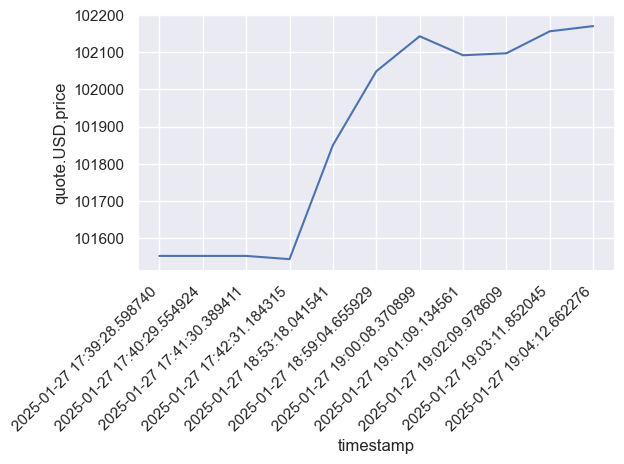

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_bitcoins)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Optionally adjust the layout to prevent label overlapping
plt.tight_layout()

# Show the plot
plt.show()
